In [8]:
!pip install matplotlib
!pip install networkx
!pip install --config-settings="--global-option=build_ext" --config-settings="--global-option=-I$(brew --prefix graphviz)/include/" --config-settings="--global-option=-L$(brew --prefix graphviz)/lib/" pygraphviz

In [9]:
import os
import random
import heapq
from matplotlib import colors
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph
from IPython.core.display import Image

basepath = os.path.join('..', 'images')
if not os.path.exists(basepath):
    os.makedirs(os.path.join(basepath), exist_ok=True)

def get_color_gradient(start_color, end_color, steps):
    start = colors.hex2color(start_color)
    end = colors.hex2color(end_color)
    gradient = [colors.rgb2hex([(start[i] + (end[i] - start[i]) * step / (steps - 1)) for i in range(3)]) for step in range(steps)]
    return gradient


# Aufgabe 03 - Die MST-Heuristik für das TSP
Eine bewährte Methode gute (wenn auch nicht optimale) Rundreisen zu finden, fußt auf minimalen Spannbäumen.
Bilden Sie für den Graphen $G$ (siehe Code unten), eine solche heuristische Rundreise mittels MST-Heuristik.
Ermitteln Sie dazu:

- einen minimalen Spannbaum MST
- einen gerichteten Graphen $G_2$ bei dem jede Verbindung in MST durch eine Hin- und eine Zurückkante dargestellt wird
- einen Eulerkreis k in $G_2$ der in Linz beginnt und endet
- einen Hamiltonkreis $r$ in $G$ in dem Sie $k$ folgen und bereits besuchte Knotenüberspringen

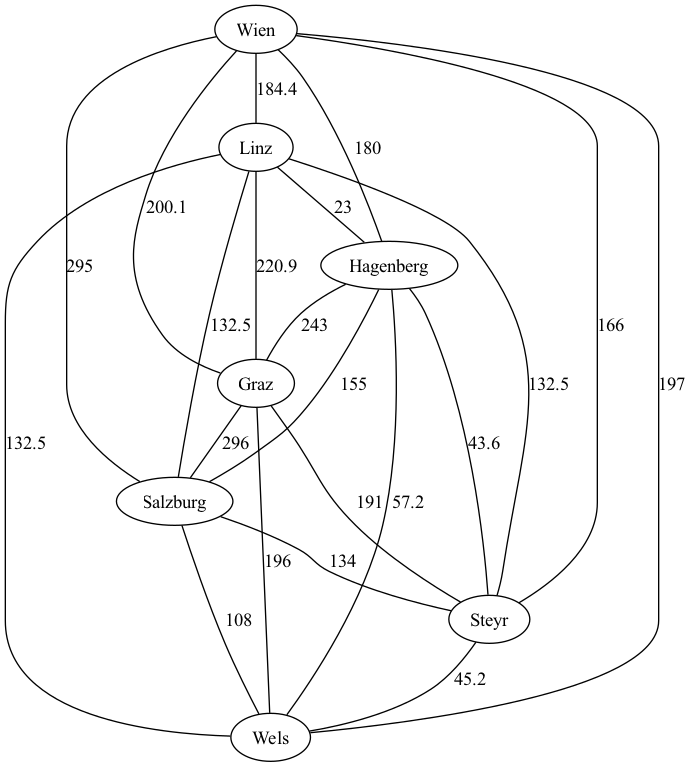

In [10]:
G = nx.Graph()
G.add_weighted_edges_from([
    ("Wien", "Linz",184.4),
    ("Wien", "Hagenberg",180),
    ("Wien", "Graz",200.1),
    ("Wien", "Salzburg",295),
    ("Wien", "Steyr",166),
    ("Wien", "Wels",197),
    ("Linz", "Hagenberg",23),
    ("Linz", "Graz",220.9),
    ("Linz", "Salzburg",132.5),
    ("Linz", "Wels",132.5),
    ("Linz", "Steyr",132.5),
    ("Salzburg", "Steyr",134),
    ("Salzburg", "Graz",296),
    ("Salzburg", "Wels",108),
    ("Salzburg", "Hagenberg",155),
    ("Graz", "Steyr",191),
    ("Graz", "Wels",196),
    ("Graz", "Hagenberg",243),
    ("Wels", "Steyr",45.2),
    ("Wels", "Hagenberg",57.2),
    ("Steyr", "Hagenberg",43.6)
])

g = to_agraph(G)
g.layout(prog='dot')

for edge in g.edges():
    edge.attr['label'] = edge.attr['weight']

graph_file = os.path.join(basepath, f'a02a_graph.png')
g.draw(graph_file, prog='dot', format='png')

display(Image(graph_file))

## Minimaler Spannbaum

The cost of the MST is: 576.8000000000001


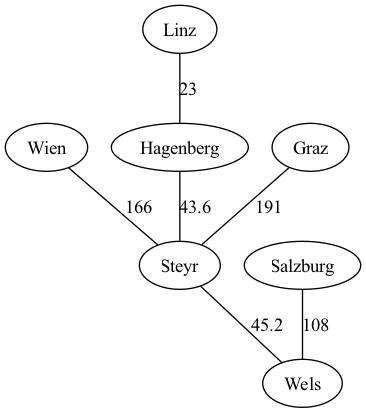

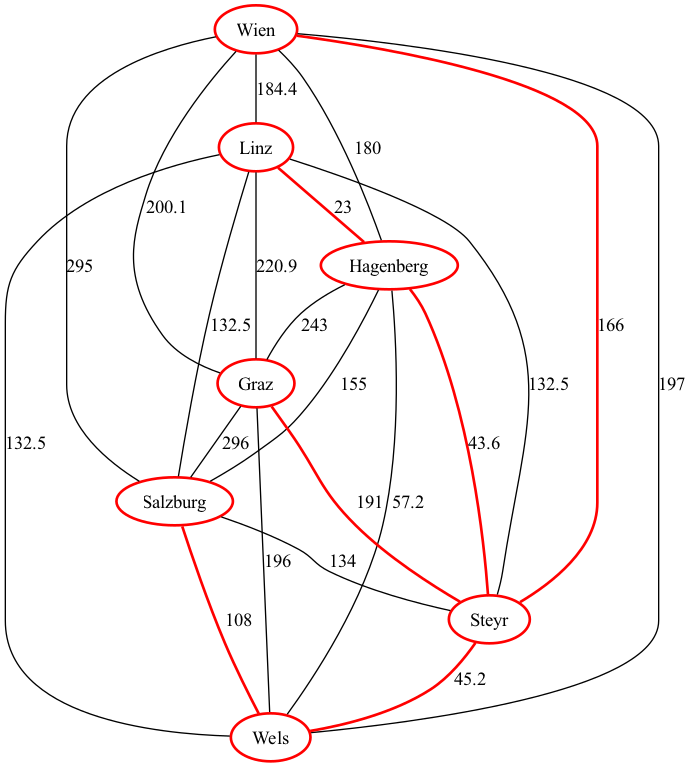

In [11]:
mst = nx.minimum_spanning_tree(G, algorithm='kruskal')

# Calculate the cost of the MST
mst_cost = sum(data['weight'] for u, v, data in mst.edges(data=True))
print(f'The cost of the MST is: {mst_cost}')

g = to_agraph(mst)
for edge in g.edges():
    edge.attr['label'] = edge.attr['weight']
graph_path = os.path.join(basepath, 'a04a_mst.png')
g.draw(graph_path, prog='dot', format='png')
display(Image(graph_path))

g = to_agraph(G)

for edge in g.edges():
    edge.attr['label'] = edge.attr['weight']
    
# Mark the MST edges in red on the original graph
for edge in mst.edges(data=True):
    g.get_edge(edge[0], edge[1]).attr['color'] = 'red'
    g.get_edge(edge[0], edge[1]).attr['penwidth'] = 2.0

for node in mst.nodes():
    g.get_node(node).attr['color'] = 'red'
    g.get_node(node).attr['penwidth'] = 2.0

highlighted_graph_file = os.path.join(basepath, f'a04a_graph_highlighted.png')
g.draw(highlighted_graph_file, prog='dot', format='png')
display(Image(highlighted_graph_file))

## Gerichter Graph G2

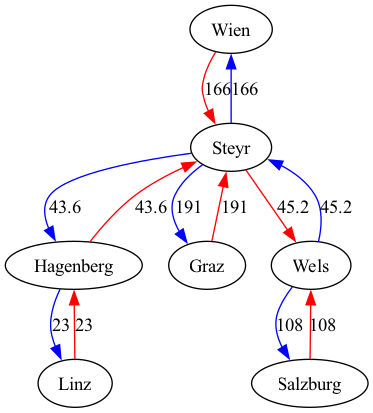

In [12]:
G_2 = nx.DiGraph()

for edge in mst.edges(data=True):
    G_2.add_edge(edge[0], edge[1], weight=edge[2]['weight'], color='red')
    G_2.add_edge(edge[1], edge[0], weight=edge[2]['weight'], color='blue')

g = to_agraph(G_2)
for edge in g.edges():
    edge.attr['label'] = edge.attr['weight']

graph_path = os.path.join(basepath, 'a04a_g2.png')
g.draw(graph_path, prog='dot', format='png')
display(Image(graph_path))

## Euler-Kreis

Euler-Kreis: [('Linz', 'Hagenberg'), ('Hagenberg', 'Steyr'), ('Steyr', 'Wels'), ('Wels', 'Salzburg'), ('Salzburg', 'Wels'), ('Wels', 'Steyr'), ('Steyr', 'Graz'), ('Graz', 'Steyr'), ('Steyr', 'Wien'), ('Wien', 'Steyr'), ('Steyr', 'Hagenberg'), ('Hagenberg', 'Linz')]


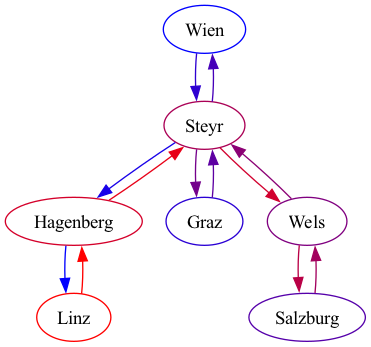

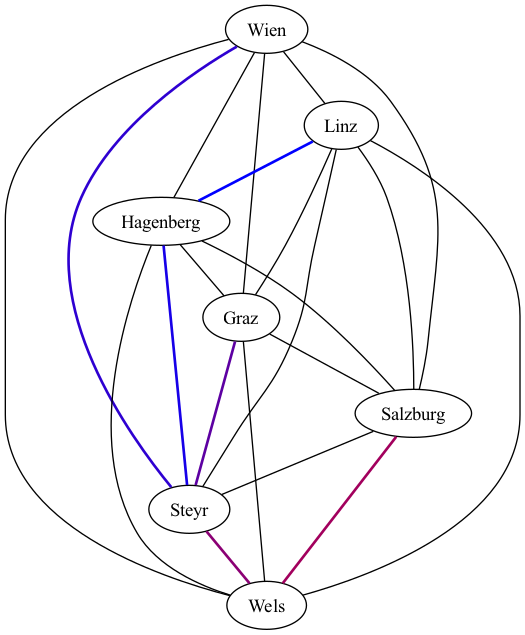

In [13]:
k = list(nx.eulerian_circuit(G_2, source='Linz'))
print(f'Euler-Kreis: {list(k)}')

g = to_agraph(G_2)
start_color = '#FF0000' #00FF00
end_color = '#0000FF' #006400
colors_list = get_color_gradient(start_color, end_color, len(k))

for idx, edge in enumerate(k):
    g.get_edge(edge[0], edge[1]).attr['color'] = colors_list[idx]

# Color the nodes with the gradient colors
unique_nodes = list(dict.fromkeys([n for edge in k for n in edge])) # get unique nodes in the order of their appearance
node_colors = get_color_gradient(start_color, end_color, len(unique_nodes))

for idx, node in enumerate(unique_nodes):
    g.get_node(node).attr['color'] = node_colors[idx]

graph_path = os.path.join(basepath, 'a04a_euler.png')
g.draw(graph_path, prog='dot', format='png')
display(Image(graph_path))

g = to_agraph(G)

# Mark the MST edges on the original graph

start_color = '#FF0000' #00FF00
end_color = '#0000FF' #006400
colors_list = get_color_gradient(start_color, end_color, len(k))
for idx, edge in enumerate(k):
    g.get_edge(edge[0], edge[1]).attr['color'] = colors_list[idx]
    g.get_edge(edge[0], edge[1]).attr['penwidth'] = 2.0

highlighted_graph_file = os.path.join(basepath, f'a04a_euler_highlighted.png')
g.draw(highlighted_graph_file, prog='dot', format='png')
display(Image(highlighted_graph_file))


## Hamilton-Kreis

Hamilton-Kreis: ['Wels', 'Hagenberg', 'Graz', 'Wien', 'Salzburg', 'Linz', 'Steyr']
Hamilton-Kreis Tupel: [('Wels', 'Hagenberg'), ('Hagenberg', 'Graz'), ('Graz', 'Wien'), ('Wien', 'Salzburg'), ('Salzburg', 'Linz'), ('Linz', 'Steyr')]


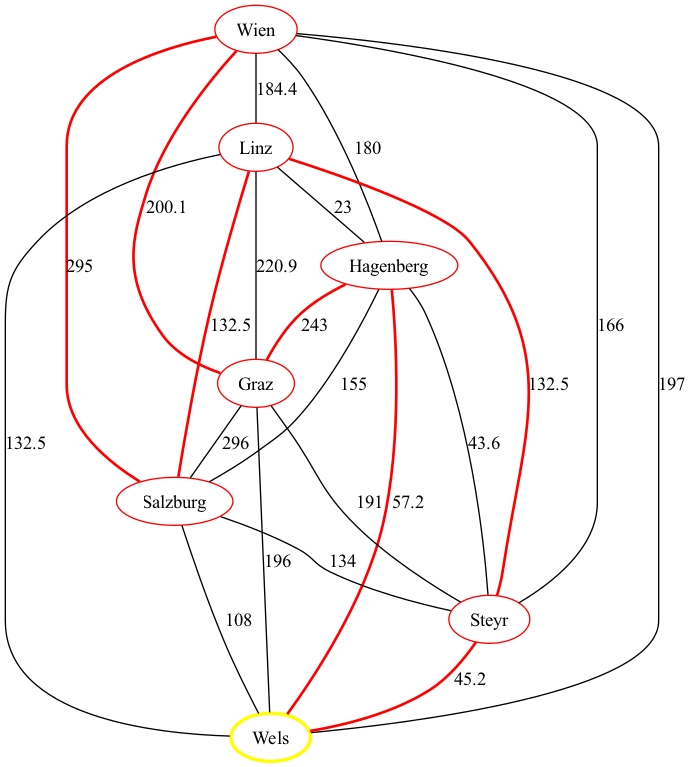

In [14]:
r = list(set(map(lambda e: e[0], k)))
print(f'Hamilton-Kreis: {list(r)}')
print(f'Hamilton-Kreis Tupel: {list(zip(r,r[1:]))}')
g = to_agraph(G)

for edge in g.edges():
    edge.attr['label'] = edge.attr['weight']

for edge in zip(r,r[1:]):
    g.get_edge(edge[0], edge[1]).attr['color'] = 'red'
    g.get_edge(edge[0], edge[1]).attr['penwidth'] = 2.0
    g.get_node(edge[0]).attr['color'] = 'red'
    g.get_node(edge[1]).attr['color'] = 'red'

g.get_edge(r[0], r[-1]).attr['color'] = 'red'
g.get_edge(r[0], r[-1]).attr['penwidth'] = 2.0
g.get_node(r[0]).attr['penwidth'] = 2.5
g.get_node(r[0]).attr['color'] = 'yellow'

highlighted_graph_file = os.path.join(basepath, f'a04a_hamilton.png')
g.draw(highlighted_graph_file, prog='dot', format='png')
display(Image(highlighted_graph_file))